# Weather data 

This project uses real-time weather data from the Met Eireann API to monitor and visualise weather conditions in Athenry. The API provides detailed observations on temperature, windspeed, humidity, atmospheric pressure rainfall and wind direction. This project uses an automated workflow(Github Actions), which retrieves weather data daily and saves it in timestamped JSoN files. The data is then loaded into a dataFrame using pandas for data manipulation and analysis. 

***


**1. Create directory structure**

To organise the projects data, a directory structure was created using the command line consisting of a directory named `data` with two subdirectories: `timestamps` and `weather`. This was done using the following commands. 

```bash
 $ mkdir -p data/timestamps
```
```bash
 $ mkdir -p data/weather
```
-   `mkdir`: This command is used to create a new directory.
-   `-p`: This ensures that parent directories are created. If the parent directories dont exist mkdir will create them automatically. 

The data directory is designed to store all the project related data with: 
-   `timestamps`: A subdirectory to store files related to timestamped data. 
-   `weather`: A subdirectory to store weather data retrieved from the API. 

**2. Timestamps**

In the `data/timestamps` directory, the `date` command was used to output the current date and time to a file named `now.txt`. The append operator `>>` was used to ensure that each new output is appended to the end of the file instead of overwriting the existing file contents. This allows the file to gather multiple timestamps without losing previous data. The process was repeated 10 times to collect several timestamps. 

```bash
$ date >> now.txt 

```
-   `date`: this command outputs the current date and time. 
-   `(>>)`The append operator: ensures that the output is added to the end of the file. if the file doesnt exist it will be created. 

-   To view the contents of the file, the `more` command can be used which will show the contents of the file on the command line. 



**3. Formatting timestamps**

The `date` command was used with a specific format to output the current date and time. The date was formatted using the `"%Y%m%d_%H%M%S"` format string, which ensures the date and time are displayed in a year-month-day_hour-minute-second format. 
The formatted date time was appended to a new file `formatted.txt`

```bash 
$ date +"%Y%m%d_%H%M%S" >> formatted.txt 
```

**4: Create timestamp files**

A timestamped file was created using the `touch` command combined with the `date` command.  

```bash
$ touch 'date +"%Y%m%d_%H%M%S.txt"`
```
-   `touch`: this command is used to create a new file.  
-   embedding the date in backticks allows a timestamped txt file to be created. 
-   .txt: gives the timestamped file a .txt extension. 

This command ensures that each time its run, a new file with a unique timstamped name is created. 

**5: Download todays weather data**

In the `data/weather` directory, the latest weather data for Athenry weather station was obtained from Met Eireanns API via the URL using the `wget` command. 

```bash
$ wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today
```
-   `wget`: This command is used to download content from the web. (weather data from Met Eireanns API)
-   ```-O:``` The -O (output) specifies that the downloaded data is saved as `weather.json`. 

This command downloads the latest weather data and saves it in the file `weather.json` in the `data/weather` directory. 


**6: Timestamp the data**

A timestamped file was created using the `wget` command with the `date` command. The filename is based on the date and time the file was created. 

```bash
$ wget -O `date +"%Y%m%d_%H%M%S.json"` 
```

This command downloads the latest weather data and saves it as a timestamped file in the format YYYYMMDD_HHMMSS.json in the data/weather directory. 

**7: Write the script**

A bash script named weather.sh was developed to automate the process of collecting and storing weather data from Met Eireann's API.
```bash
#! /bin/bash 

$ wget -O data/weather/`date +"%Y%m%d_%H%M%S_athenry.json"` https://prodapi.metweb.ie/observations/athenry/today 
```

-   The script begins with the shebang `#! /bin/bash` which specifies that the script should be executed using the bash shell. 

-   The script uses the `wget` command to send an HTTP GET request to the Met Eireann API endpoint via the specified URL. The server responds with weather data in JSON format which is saved to a file in the `data/weather` directory.
-   The `-O` option in the `wget` command is used to create a file name with a timestamp.  
-   Before the script can be executed, the chmod+x weather.sh command is used to grant the necessary execute permissions allowing the script to run. 
-   The script can be run directly from the command line 
by typing `./weather.sh`




***

## **Weather Data Analysis:**



In [18]:
# import dataframe

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates



In [2]:
# Load the data into a DataFrame. 

df=pd.read_json('data/weather/20241219_211316_athenry.json')

In [10]:
# first 5 rows

df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date
reportTime,,,,,,,,,,,,,,
2024-12-20 00:00:00,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19
2024-12-20 01:00:00,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19
2024-12-20 02:00:00,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19
2024-12-20 03:00:00,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19
2024-12-20 04:00:00,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19


In [11]:
# last 5 rows

df.tail()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date
reportTime,,,,,,,,,,,,,,
2024-12-20 16:00:00,Athenry,6,02d,Fair,"""Fair""",17,-,NW,315,74,0.00,1021,Thursday,2024-12-19
2024-12-20 17:00:00,Athenry,5,02n,Fair,"""Fair""",7,-,W,270,83,0.00,1022,Thursday,2024-12-19
2024-12-20 18:00:00,Athenry,3,02n,Fair,"""Fair""",6,-,SW,225,90,0.00,1022,Thursday,2024-12-19
2024-12-20 19:00:00,Athenry,5,05n,Rain showers,"""Rain shower""",6,-,W,270,87,0.01,1022,Thursday,2024-12-19
2024-12-20 20:00:00,Athenry,4,02n,Fair,"""Fair""",6,-,SW,225,90,0.00,1022,Thursday,2024-12-19


In [5]:
# change report time to datetime
df['reportTime']=pd.to_datetime(df['reportTime'])

C:\Users\louis\AppData\Local\Temp\ipykernel_38960\1452091971.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['reportTime']=pd.to_datetime(df['reportTime'])


In [6]:
# set reportTime as index
df.set_index('reportTime',inplace=True)
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date
reportTime,,,,,,,,,,,,,,
2024-12-20 00:00:00,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19
2024-12-20 01:00:00,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19
2024-12-20 02:00:00,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19
2024-12-20 03:00:00,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19
2024-12-20 04:00:00,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19
2024-12-20 05:00:00,Athenry,4,46n,Light rain,"""Light rain """,41,-,NW,315,86,0.10,1011,Thursday,2024-12-19
2024-12-20 06:00:00,Athenry,4,02n,Fair,"""Fair""",17,52,W,270,86,0.00,1012,Thursday,2024-12-19
2024-12-20 07:00:00,Athenry,4,02n,Fair,"""Fair""",13,-,NW,315,87,0.00,1014,Thursday,2024-12-19
2024-12-20 08:00:00,Athenry,2,02n,Fair,"""Fair""",4,-,NW,315,92,0.00,1015,Thursday,2024-12-19


In [7]:
# set index to datetime format
df.index=pd.to_datetime(df.index)
df

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date
reportTime,,,,,,,,,,,,,,
2024-12-20 00:00:00,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19
2024-12-20 01:00:00,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19
2024-12-20 02:00:00,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19
2024-12-20 03:00:00,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19
2024-12-20 04:00:00,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19
2024-12-20 05:00:00,Athenry,4,46n,Light rain,"""Light rain """,41,-,NW,315,86,0.10,1011,Thursday,2024-12-19
2024-12-20 06:00:00,Athenry,4,02n,Fair,"""Fair""",17,52,W,270,86,0.00,1012,Thursday,2024-12-19
2024-12-20 07:00:00,Athenry,4,02n,Fair,"""Fair""",13,-,NW,315,87,0.00,1014,Thursday,2024-12-19
2024-12-20 08:00:00,Athenry,2,02n,Fair,"""Fair""",4,-,NW,315,92,0.00,1015,Thursday,2024-12-19


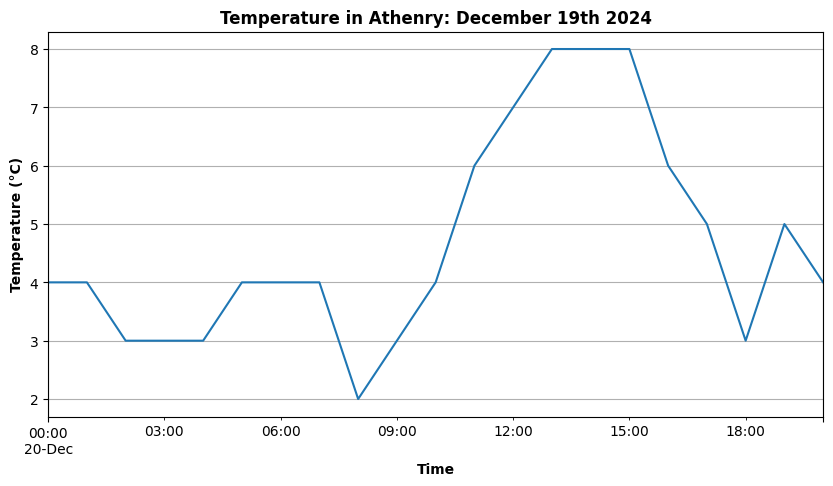

In [8]:
# plot temperature

fig, ax = plt.subplots(figsize=(10, 5))
df['temperature'].plot(ax=ax)
ax.set_title('Temperature in Athenry: December 19th 2024', fontweight='bold')
ax.set_ylabel('Temperature (°C)', fontweight='bold')
ax.set_xlabel('Time', fontweight='bold')
plt.grid()
plt.show()


The temperature shows a typical increase in the daytime hours before decreasing later in the day.

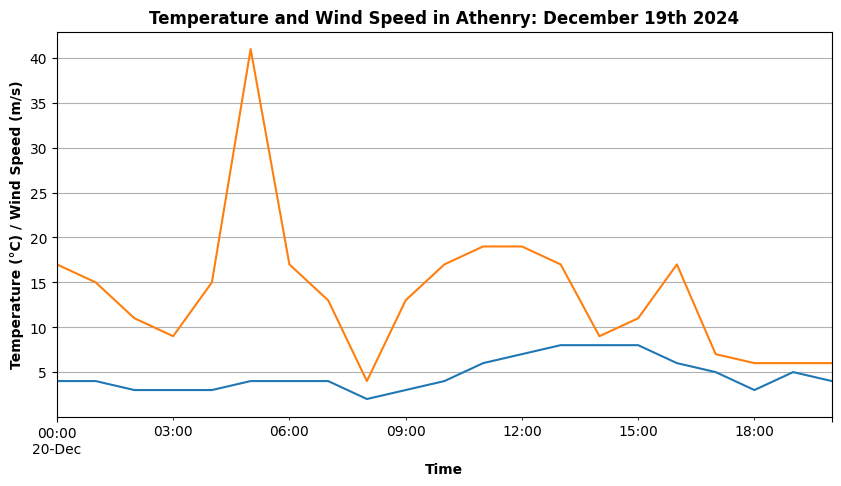

In [9]:
# plot temp and windspeed 

fig, ax = plt.subplots(figsize=(10, 5))
df['temperature'].plot(ax=ax)
df['windSpeed'].plot(ax=ax)
ax.set_title('Temperature and Wind Speed in Athenry: December 19th 2024', fontweight='bold')
ax.set_ylabel('Temperature (°C) / Wind Speed (m/s)', fontweight='bold')
ax.set_xlabel('Time', fontweight='bold')
plt.grid()
plt.show()

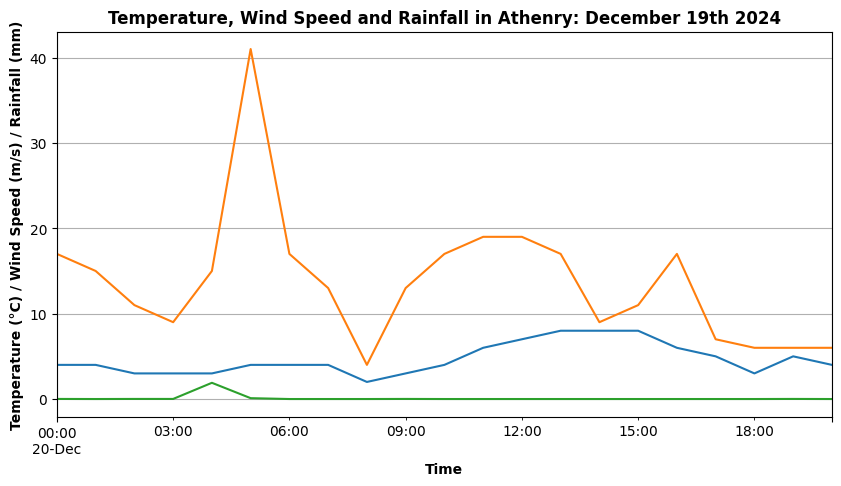

In [30]:
# plot temperature windspeed and rainfall 

fig, ax = plt.subplots(figsize=(10, 5))
df['temperature'].plot(ax=ax)
df['windSpeed'].plot(ax=ax)
df['rainfall'].plot(ax=ax)
ax.set_title('Temperature, Wind Speed and Rainfall in Athenry: December 19th 2024', fontweight='bold')
ax.set_ylabel('Temperature (°C) / Wind Speed (m/s) / Rainfall (mm)', fontweight='bold')
ax.set_xlabel('Time', fontweight='bold')
plt.grid()
plt.show()

In [13]:
df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date
reportTime,,,,,,,,,,,,,,
2024-12-20 00:00:00,Athenry,4,40n,Light rain showers,"""Recent Rain""",17,-,NW,315,84,0.01,1008,Thursday,2024-12-19
2024-12-20 01:00:00,Athenry,4,02n,Fair,"""Fair""",15,-,NW,315,84,0.00,1009,Thursday,2024-12-19
2024-12-20 02:00:00,Athenry,3,40n,Light rain showers,"""Precipitation""",11,-,W,270,85,0.01,1009,Thursday,2024-12-19
2024-12-20 03:00:00,Athenry,3,40n,Light rain showers,"""Recent Precipitation""",9,-,NW,315,88,0.01,1010,Thursday,2024-12-19
2024-12-20 04:00:00,Athenry,3,05n,Rain showers,"""Moderate Rain shower""",15,41,NW,315,93,1.90,1011,Thursday,2024-12-19


### **End**
***